# Aerodynamic Analysis of CREATeV for 2021 on August 4th

Summary: 
* Use all relevant "NEW" functions developed over the course of the year to arrive at CL, CD
* Save the results for plotting later
* Save figures for thesis writing

In [1]:
### Definining name of analysis ###
name = '2021-08-04_CREATeV_cruise_100Hz'
data_folder = 'createv-2021-08-04'
file_name = 'august04_2021.BIN'

In [2]:
from os import sys
import os
sys.path.append('../../')
import analysis
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

testing = analysis.analysis(name, data_folder, file_name)

# Importing Package and Libraries

# Importing Data

In [3]:
rate= "10ms"
interpolateM = "linear"
processor = "CREATeV_2021b"
testing.load_data(rate, interpolateM, processor)

# Defining Vehicle Parameters

In [4]:
# Vehicle parameters
testing.define_propeller('aeronaut20x8') # Using aeronaut 20x8 for this flight
testing.define_motor('U7V2_280KV')  # Using U7 V2 motor

mass = 12.6216  # From spreadsheet "FlightSummaries_CREATeV.xlsx"
span = 6.28
chord = 0.395
testing.define_airframe(mass, chord, span)

In [5]:
df = testing.df

# Mask Definition by Time

## Mask Selection Plots

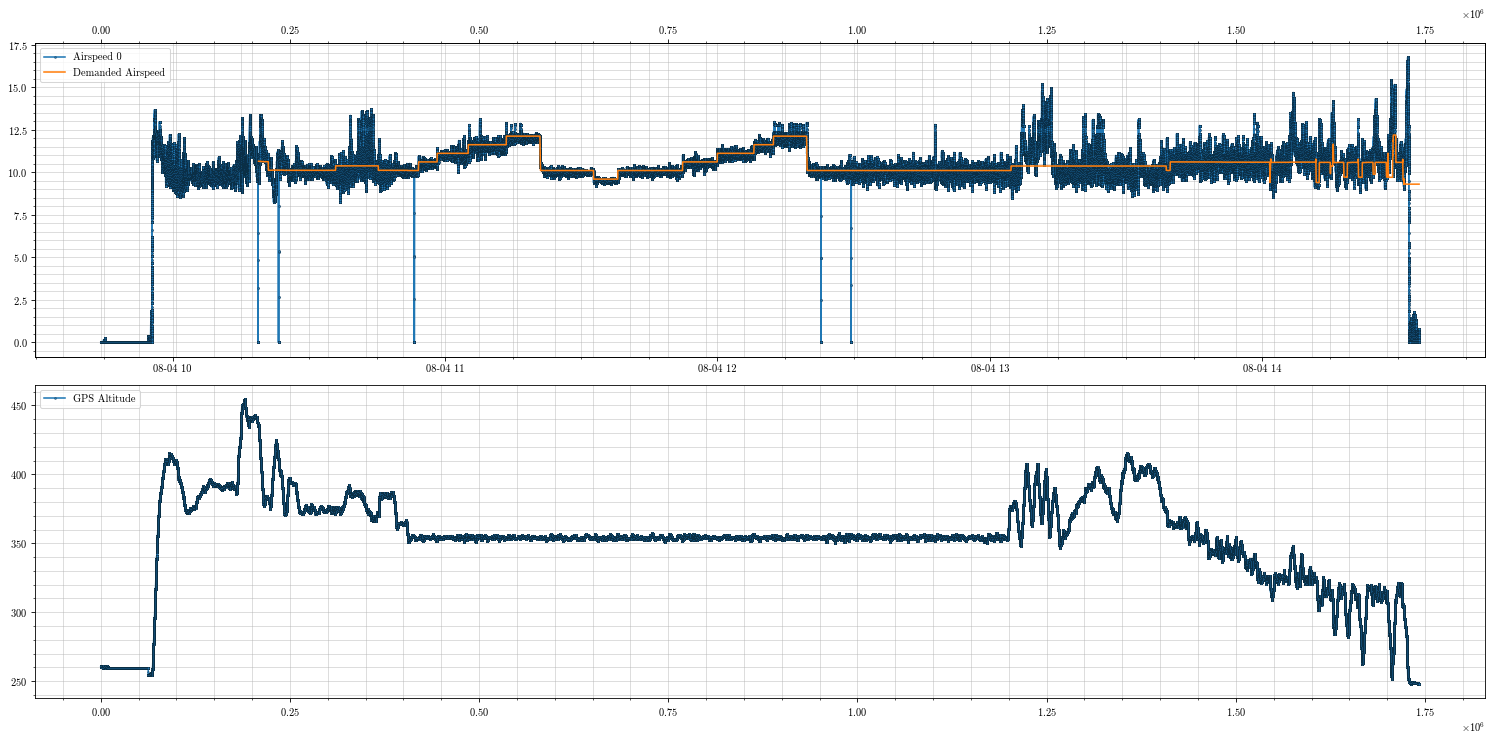

In [6]:
testing.select_segments()

In [7]:
testing.segment_times

array([], shape=(0, 2), dtype='<U1')

IndexError: index -1 is out of bounds for axis 0 with size 0

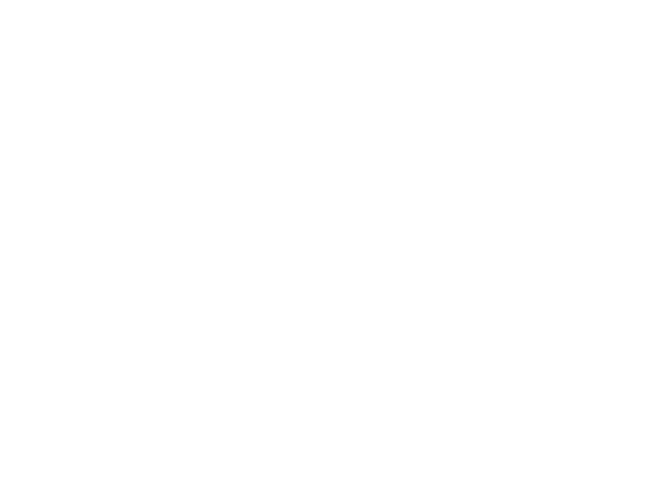

In [8]:
plt.figure()
plt.plot(testing.df[testing.masks[-1]].Airspeed_Sensor0)
plt.show()

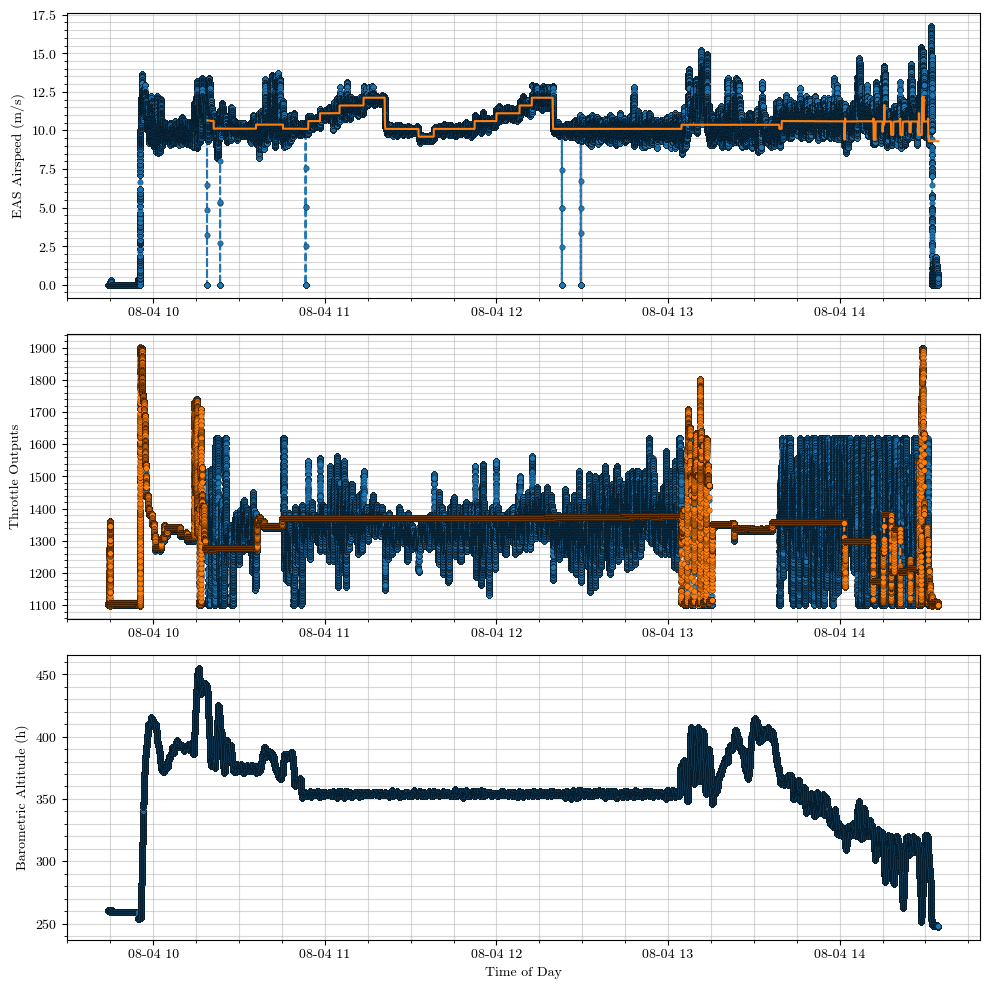

In [ ]:
# Plotting Airspeed, Establishing Cruising Time Intervals

timeindex_v_thr_h = plt.figure(figsize=(10,10))

ax0 = plt.subplot(3,1,1)
plt.plot(df.index, df.Airspeed_Sensor0, linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
# plt.plot(df.index, df.Airspeed_Sensor1, linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df.index, df.Airspeed_Demanded, linestyle='-', marker='', markersize=4, markeredgecolor=[0,0,0])

plt.ylabel("EAS Airspeed (m/s)")
ax1 = plt.subplot(3,1,2, sharex=ax0)
plt.grid("On")
plt.plot(df.index, df.ThrottleOut, linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df.index, df.Throttle, linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.ylabel("Throttle Outputs")
ax2 = plt.subplot(3,1,3, sharex=ax0)
plt.grid("On")
plt.plot(df.index, df.Altitude_GPS, linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.ylabel("Barometric Altitude (h)")
plt.xlabel("Time of Day")
plt.grid("On")
plt.show()

In [9]:
segments = testing.segment_times

In [10]:
segtimes = np.array([['10:52:04','10:54:08'],
                      ['10:54:16','10:58:12'],
                      ['10:58:21','11:05:03'],
                      ['11:05:18','11:13:28'],
                      ['11:13:36','11:20:53'],
                      ['11:21:30','11:32:39'],
                      ['11:33:07','11:38:00'],
                      ['11:38:02','11:52:16'],
                      ['11:52:27','11:59:55'],
                      ['12:00:10','12:08:00'],
                      ['12:08:30','12:12:18'],
                      ['12:12:40','12:19:35']])
segtimes
testing.select_segments(segtimes, 2021, 8, 4)
testing.segment_times

array([['10:52:04', '10:54:08'],
       ['10:54:16', '10:58:12'],
       ['10:58:21', '11:05:03'],
       ['11:05:18', '11:13:28'],
       ['11:13:36', '11:20:53'],
       ['11:21:30', '11:32:39'],
       ['11:33:07', '11:38:00'],
       ['11:38:02', '11:52:16'],
       ['11:52:27', '11:59:55'],
       ['12:00:10', '12:08:00'],
       ['12:08:30', '12:12:18'],
       ['12:12:40', '12:19:35']], dtype='<U8')

In [14]:
testing.save_segments(testing.segment_times, testing.year, testing.month, testing.day, "cruise_segments.pkl")
testing.year = 2023

testing.load_segments("cruise_segments.pkl")
testing.year

testing this function


2021

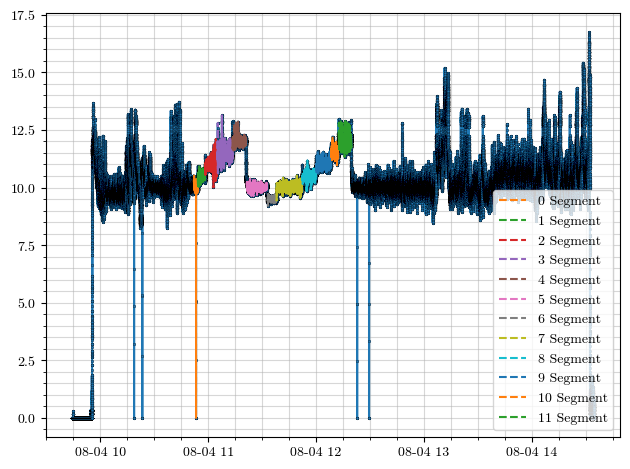

In [12]:
plt.figure()
plt.plot(df.index, df.Airspeed_Sensor0)
for i in np.arange(len(testing.masks)):
    plt.plot(testing.df.Airspeed_Sensor0[testing.masks[i]], marker='', linestyle='--', label=str(i) + " Segment")
plt.legend()
plt.show()

NameError: name 'masks' is not defined

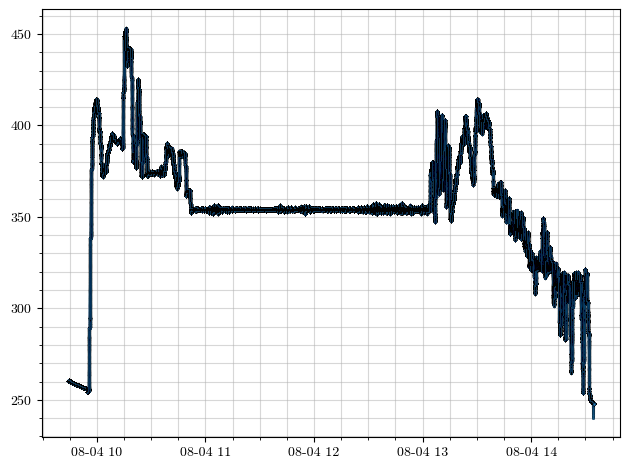

In [13]:
plt.figure()
plt.plot(df.index, df.Altitude_POS)
for i in np.arange(len(masks)):
    plt.plot(df.Altitude_POS[masks[i]], marker='', linestyle='--', label=str(i) + " Segment")
plt.legend()
plt.show()

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


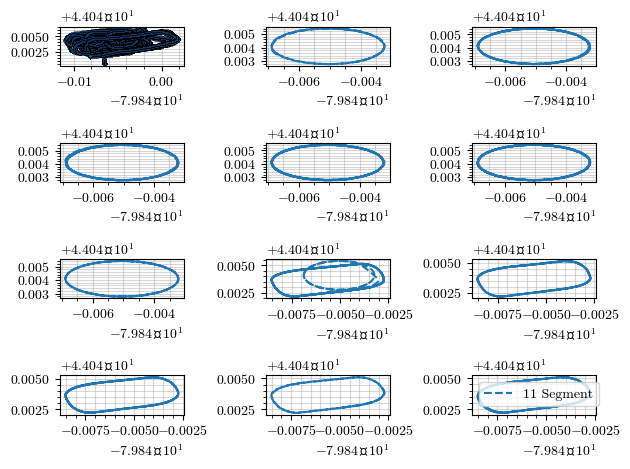

In [ ]:
fig, axs = plt.subplots(4, 3)
axs = axs.flatten()
axs[0].plot(df.Longitude, df.Latitude)
for i in np.arange(1,12):
    axs[i].plot(df.Longitude[masks[i]], df.Latitude[masks[i]], marker='', linestyle='--', label=str(i) + " Segment")
plt.legend()
plt.show()

## Notes on the selected intervals

* Intervals 1 to 6 are all circular ground tracks that are good for the airspeed calibration
* Intervals 6 to 11 are racetrack like loops, and should be fine for the performance assessment, making sure that the throttle demanded is still reasonably constant